<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/analise_cluster_selecionando_atributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Cluster Selecionando Atributos

Neste notebook, vamos usar o kmeans para fazer a análise de cluster selcionando apenas alguns atributos em vez de usar uma grande parte para verificar se o dataset fica bem segmentado

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [80]:
# Importando o arquivo csv
mercari = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de train_data.csv')
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11


primeiramente vou aplicar o kmeans para os atributos de *price* e *item_condition_id* para verificar como o mesmo é segmentado.

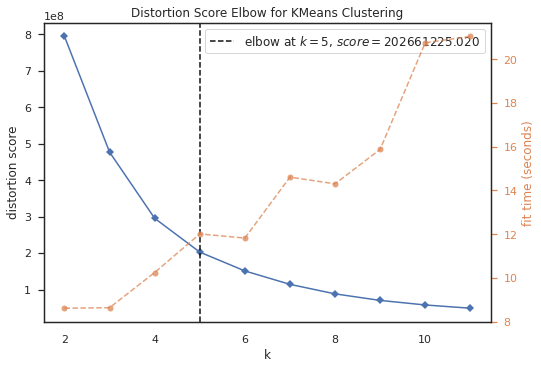

In [81]:
# Aplicando o metodo do cotovelo
x = mercari[['price','item_condition_id','category_1']]
x = pd.get_dummies(x,columns=['category_1'])
kmeans = KMeans()
met_cot = KElbowVisualizer(kmeans, k=(2,12))
met_cot.fit(x)
met_cot.show()

Escolhi 4 cluster pois verifiqueis que a divisão é melhor do que com cinco clusters.

In [82]:
# Aplicando o kmeans
kmeans = KMeans(n_clusters=4).fit(x)

In [83]:
mercari['cluster'] = kmeans.labels_
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,cluster
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2,0
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1,0
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11,0
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4,0
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11,0


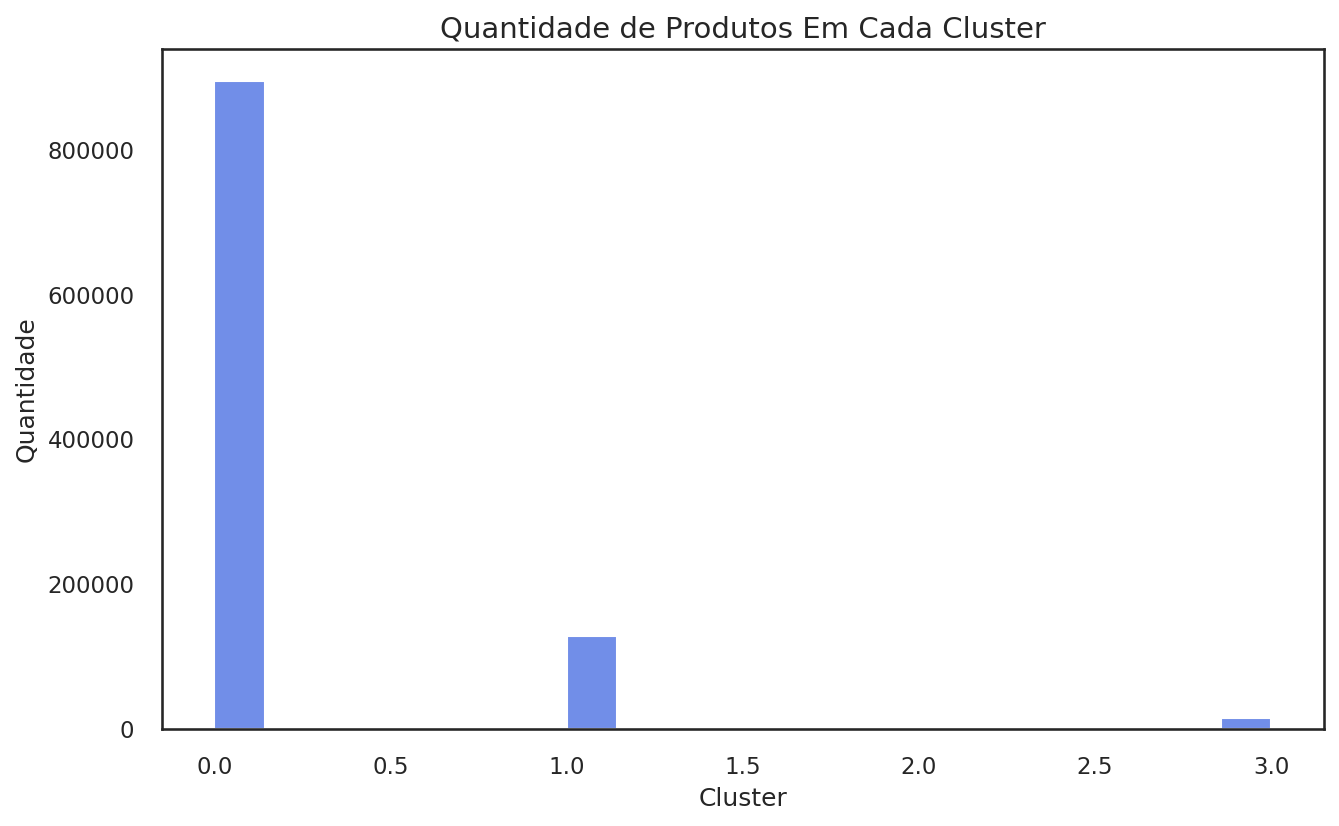

In [159]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos Em Cada Cluster',fontsize=14)
sns.histplot(x='cluster',data=mercari,color='royalblue')
plt.ylabel('Quantidade')
plt.xlabel('Cluster');

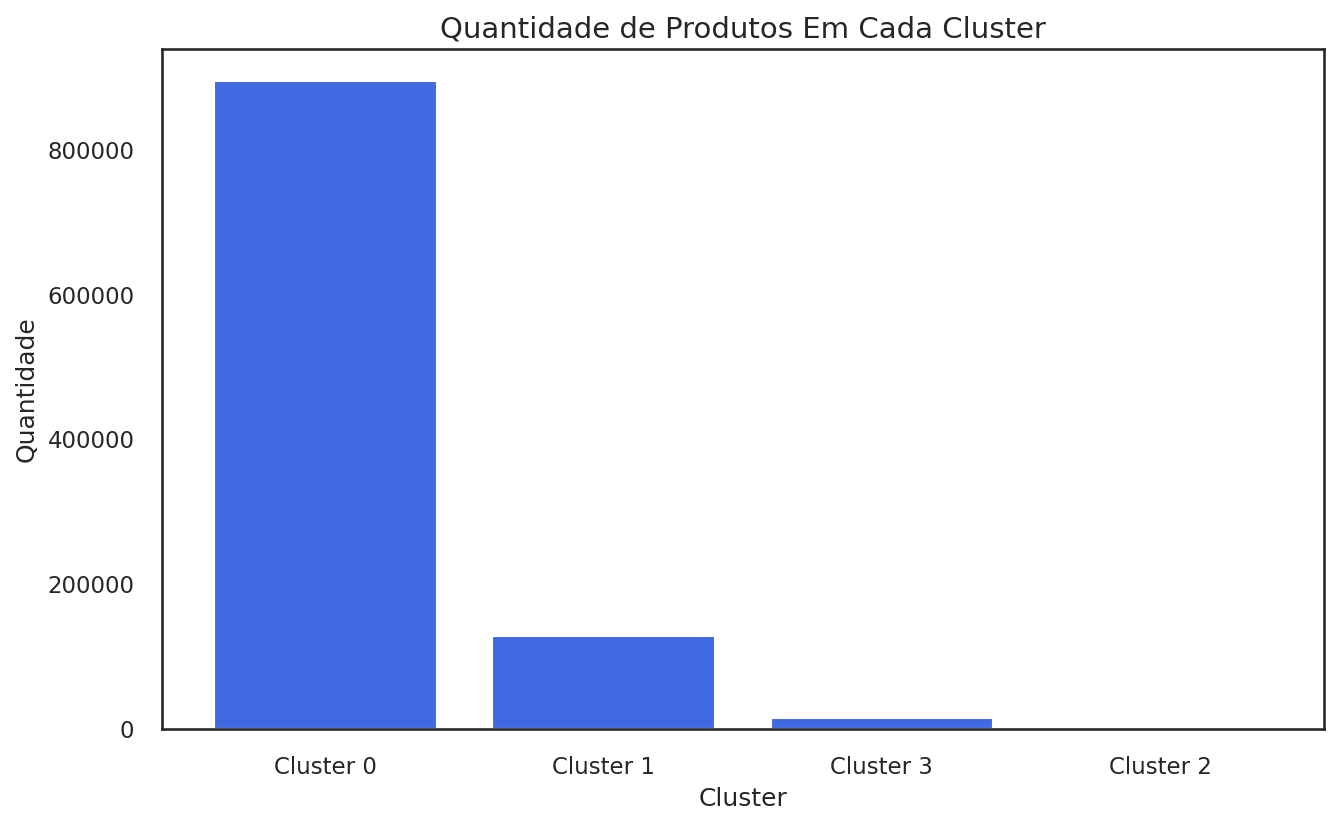

In [180]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos Em Cada Cluster',fontsize=14)
clusters = ['Cluster 0','Cluster 1','Cluster 3','Cluster 2']
plt.bar(clusters,mercari['cluster'].value_counts(),color='royalblue')
plt.ylabel('Quantidade')
plt.xlabel('Cluster');

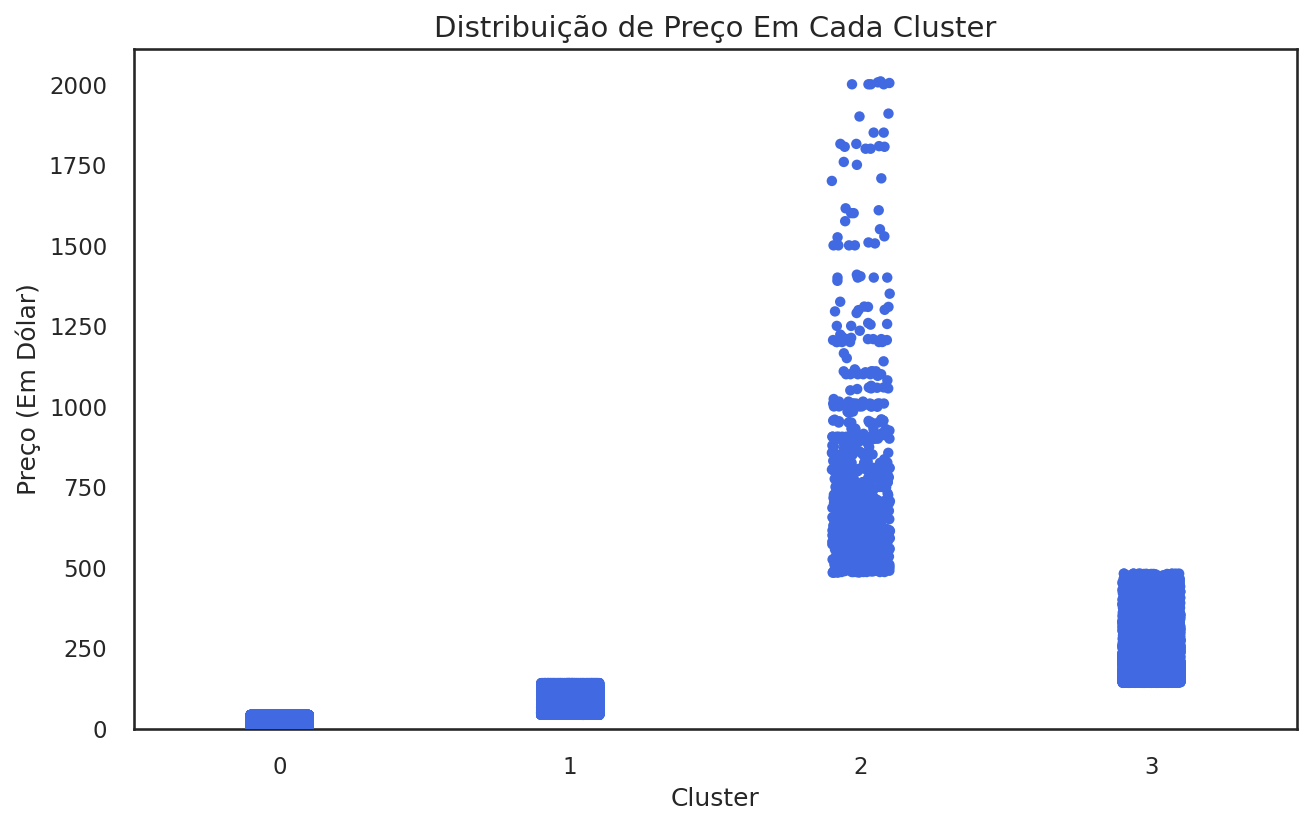

In [85]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição de Preço Em Cada Cluster',fontsize=14)
sns.stripplot(x='cluster',y='price',data=mercari,color='royalblue')
plt.ylim(bottom=0)
plt.xlabel('Cluster')
plt.ylabel('Preço (Em Dólar)');

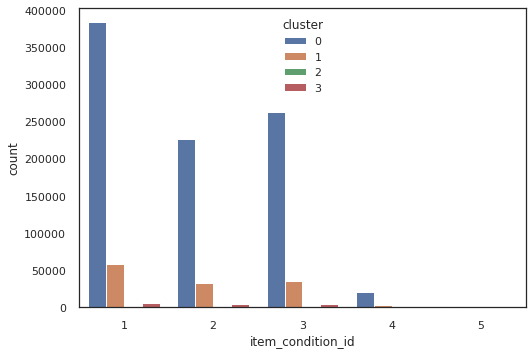

In [86]:
sns.countplot(x='item_condition_id',data=mercari,hue='cluster')

## Cluster 0

In [87]:
mercari[mercari['cluster']==0].describe()['price']

count    893797.000000
mean         17.210869
std           9.260654
min           3.000000
25%          10.000000
50%          15.000000
75%          23.000000
max          42.000000
Name: price, dtype: float64

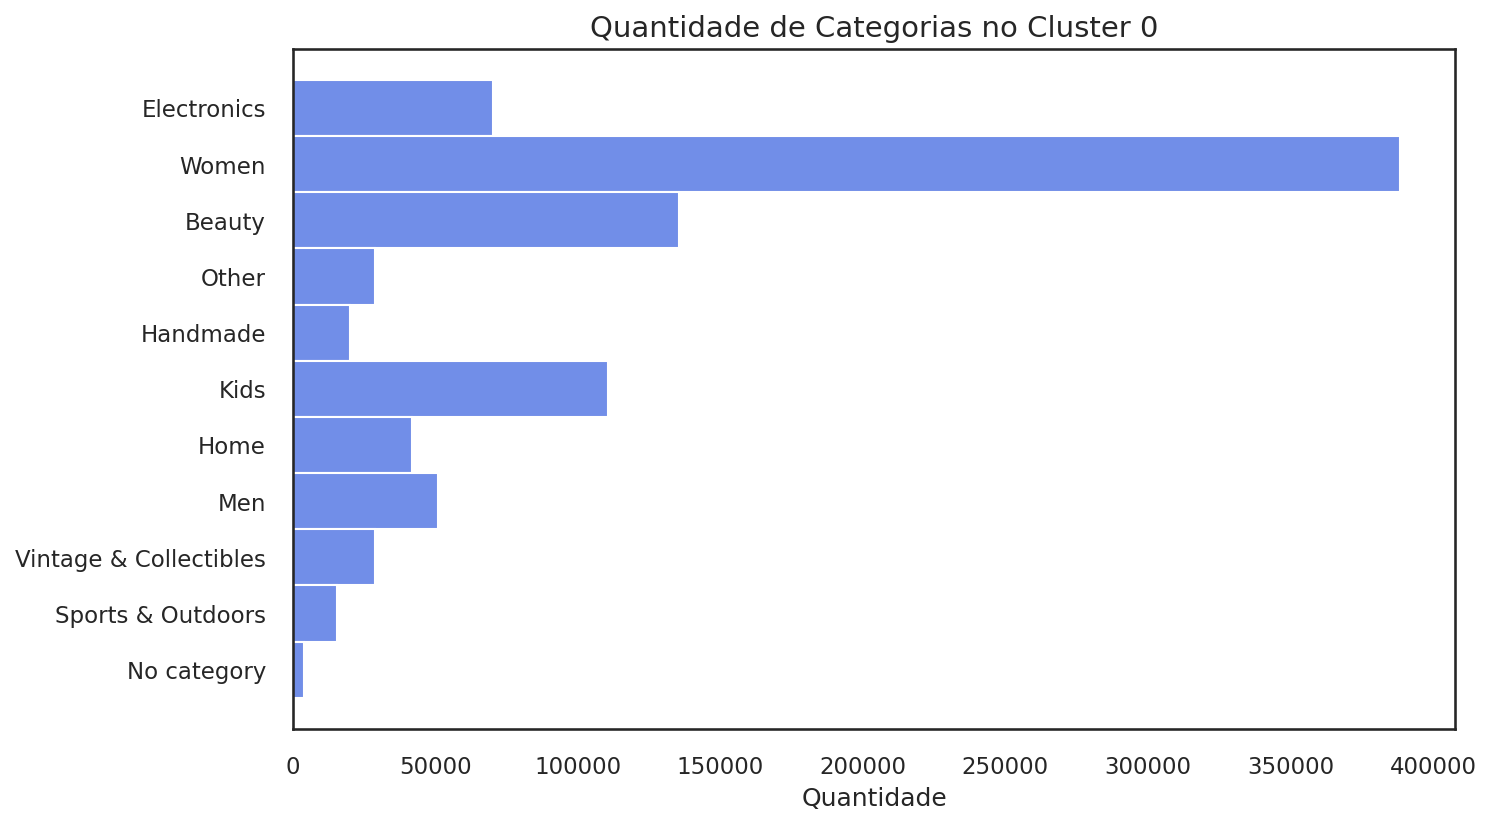

In [160]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Categorias no Cluster 0',fontsize=14)
sns.histplot(y='category_1',data=mercari[mercari['cluster']==0],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

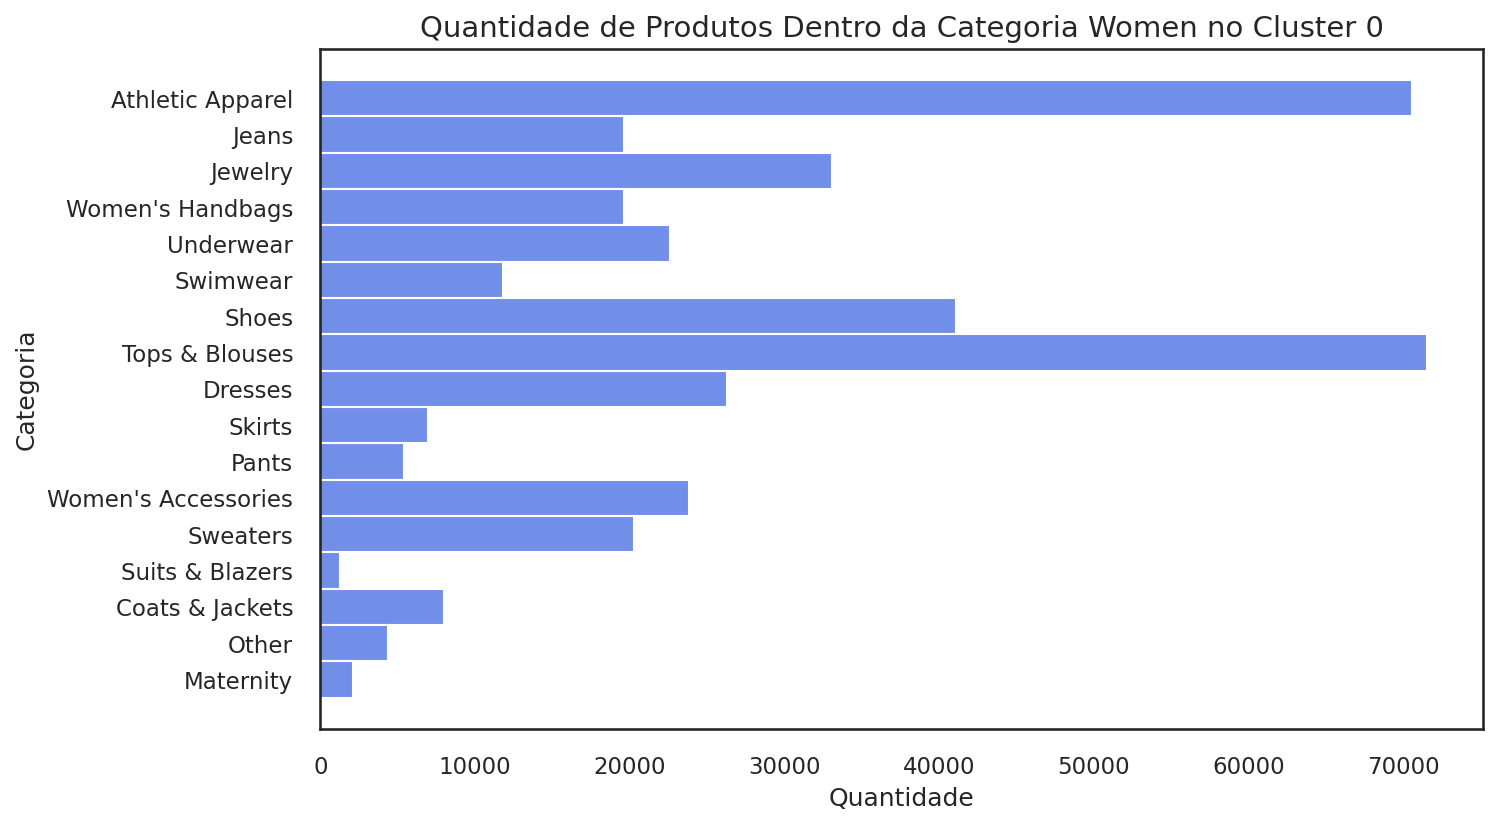

In [184]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos Dentro da Categoria Women no Cluster 0',fontsize=14)
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==0) & (mercari['category_1']=='Women')],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Categoria');

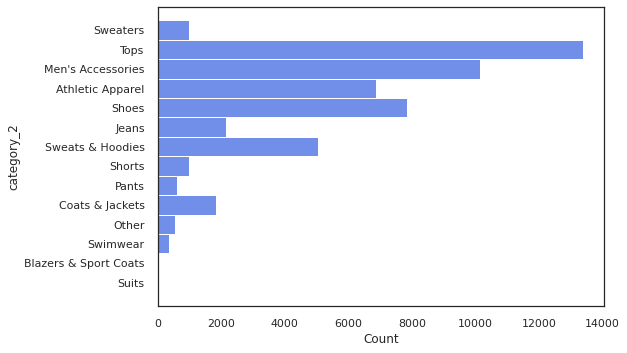

In [90]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==0) & (mercari['category_1']=='Men')],
             color='royalblue')

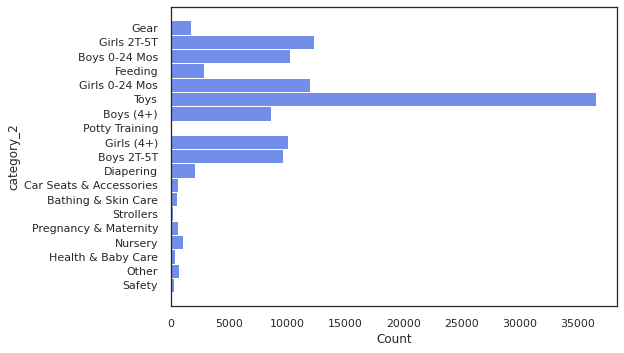

In [91]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==0) & (mercari['category_1']=='Kids')],
             color='royalblue')

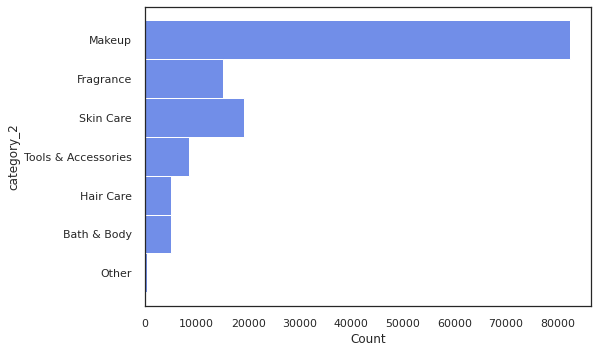

In [92]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==0) & (mercari['category_1']=='Beauty')],
             color='royalblue')

<BarContainer object of 30 artists>

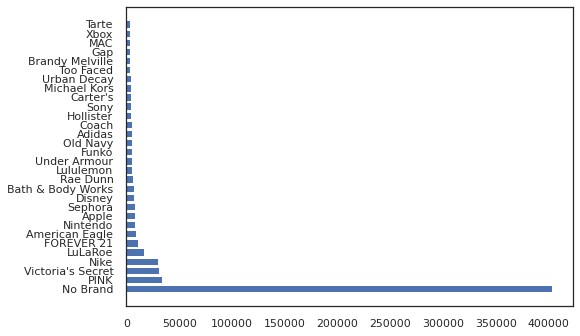

In [93]:
plt.barh(mercari[mercari['cluster']==0]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==0]['brand_name'].value_counts()[0:30])

In [167]:
marca_cluster_0 = mercari[mercari['cluster']==0]['brand_name'].value_counts()[0:30]
marca_cluster_0 = pd.DataFrame(list(marca_cluster_0),
                              index=mercari[mercari['cluster']==0]['brand_name'].value_counts().index[0:30],
                                columns=['quantidade'])
marca_cluster_0

,quantidade
No Brand,402881
PINK,33356
Victoria's Secret,30521
Nike,30034
LuLaRoe,16892
FOREVER 21,10608
American Eagle,9194
Nintendo,8306
Apple,7873
Sephora,7825


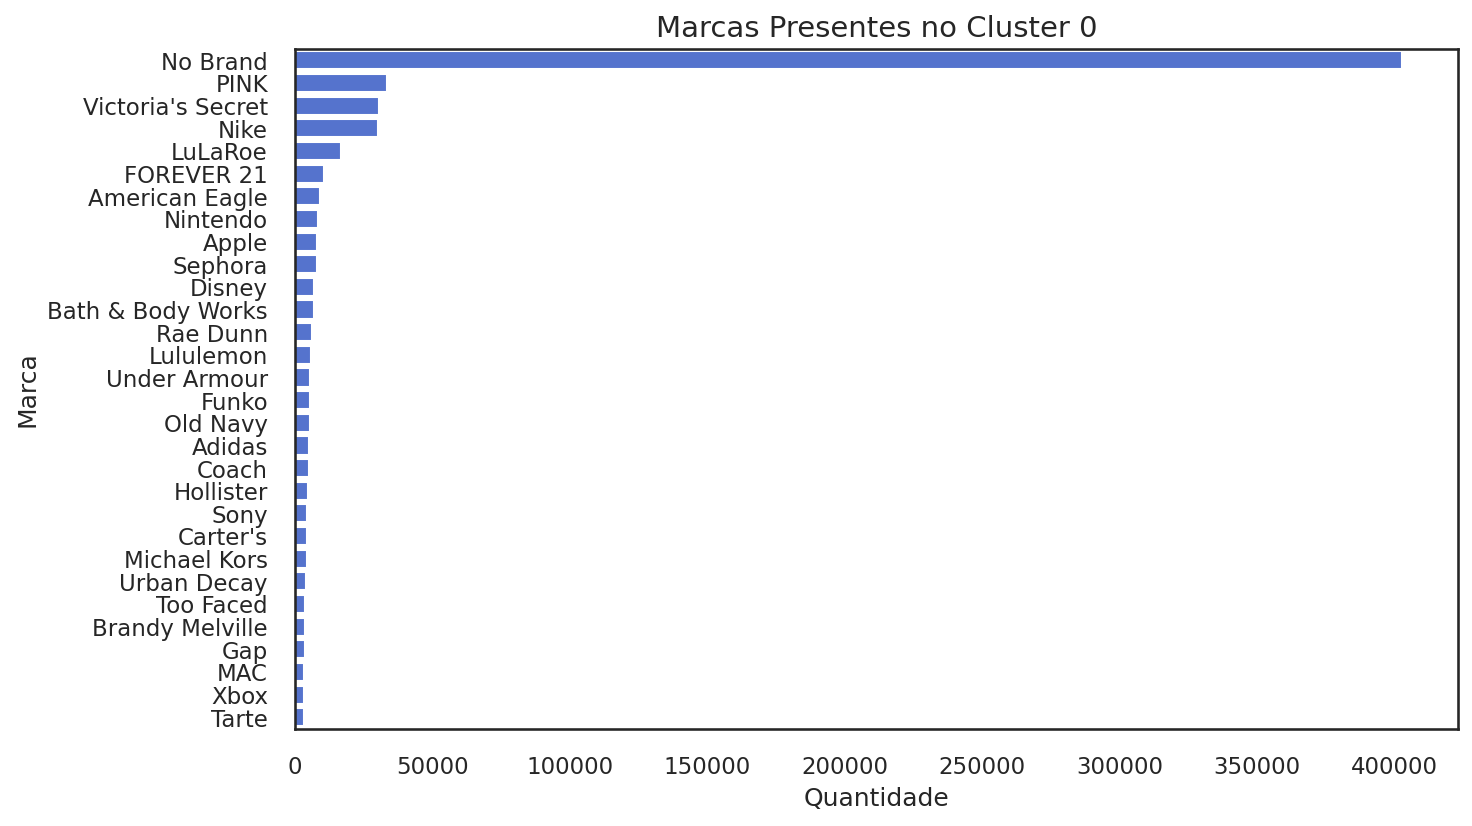

In [168]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Marcas Presentes no Cluster 0',fontsize=14)
sns.barplot(y=marca_cluster_0.index,x='quantidade',data=marca_cluster_0,color='royalblue')
plt.ylabel('Marca')
plt.xlabel('Quantidade');

## Cluster 1

In [95]:
mercari[mercari['cluster']==1].describe()['price']

count    128078.000000
mean         67.286076
std          23.357872
min          42.500000
25%          50.000000
50%          60.000000
75%          79.000000
max         141.000000
Name: price, dtype: float64

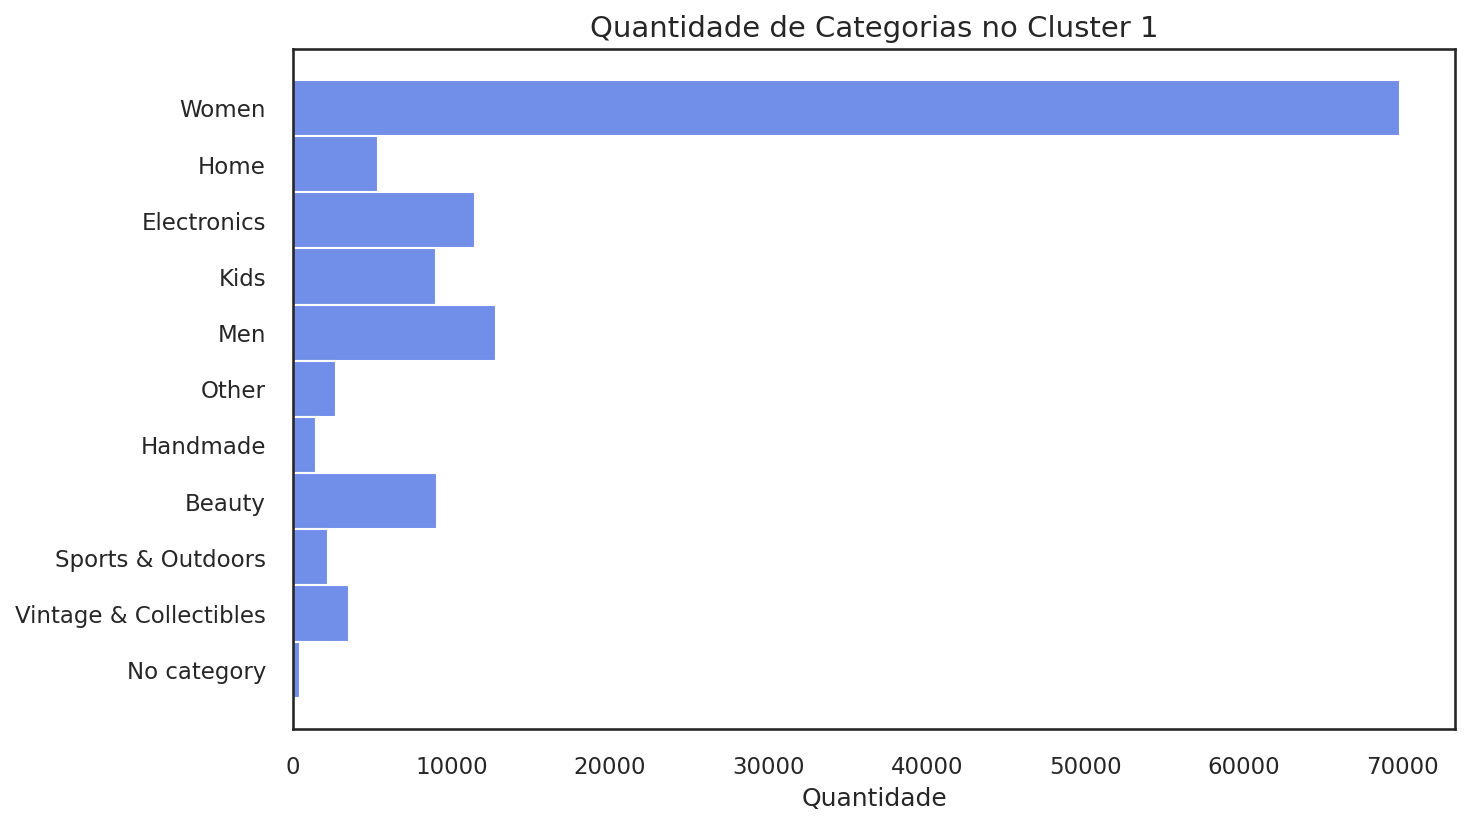

In [161]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Categorias no Cluster 1',fontsize=14)
sns.histplot(y='category_1',data=mercari[mercari['cluster']==1],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

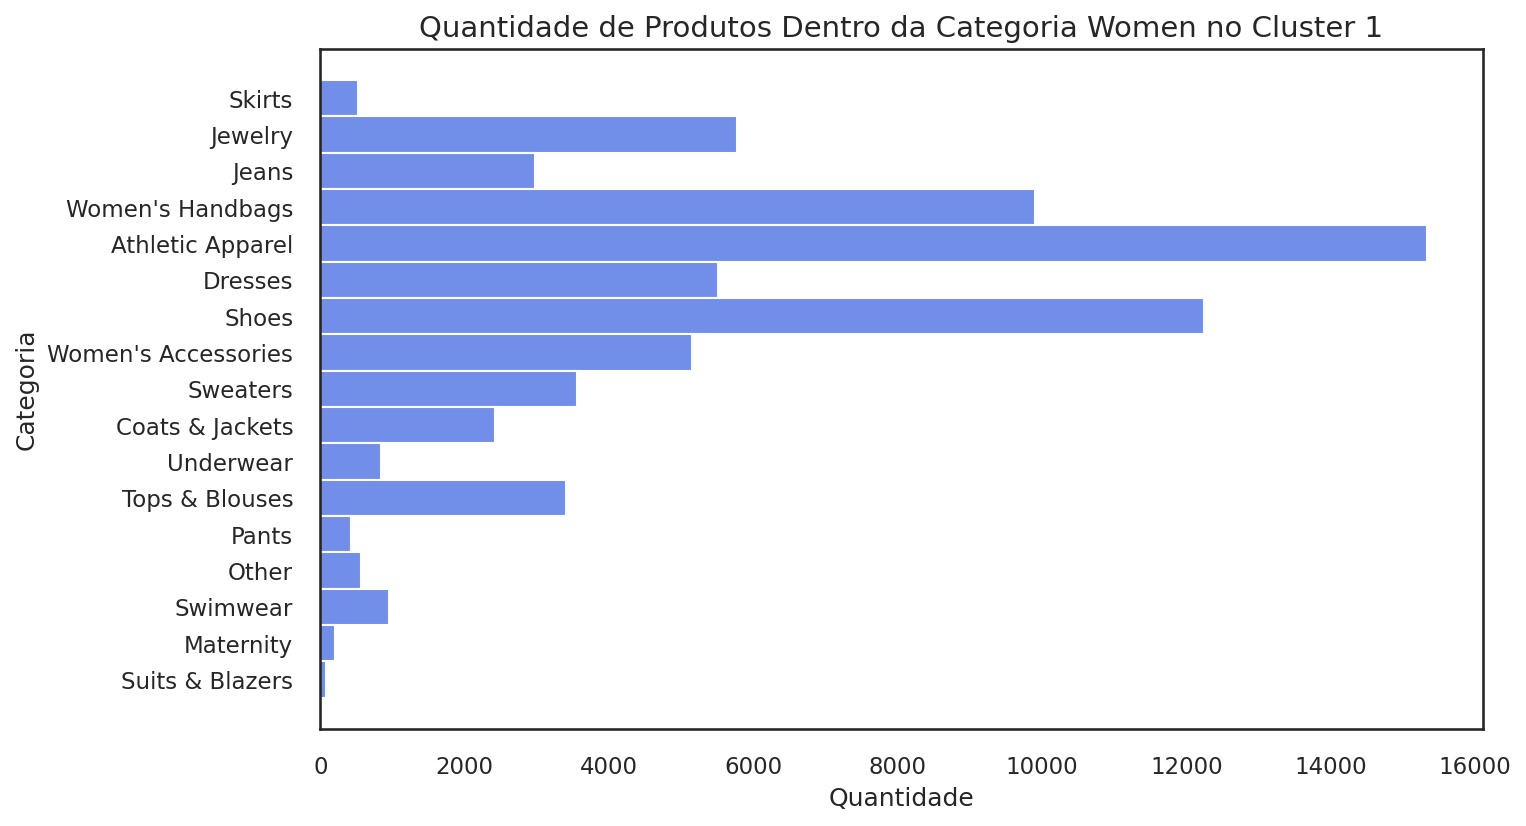

In [185]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos Dentro da Categoria Women no Cluster 1',fontsize=14)
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==1) & (mercari['category_1']=='Women')],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Categoria');

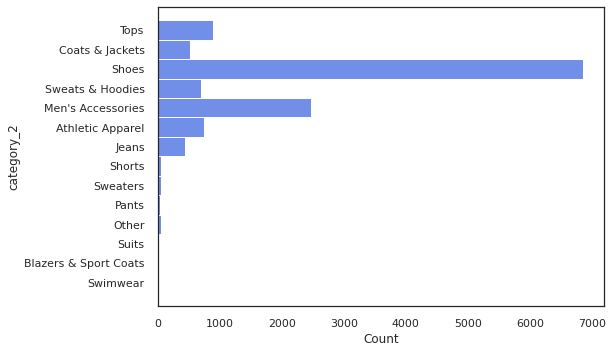

In [98]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==1) & (mercari['category_1']=='Men')],
             color='royalblue')

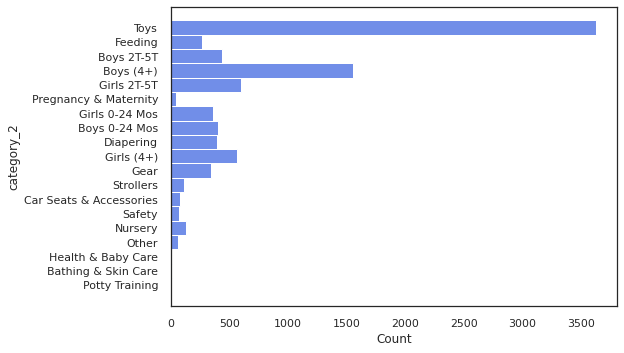

In [99]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==1) & (mercari['category_1']=='Kids')],
             color='royalblue')

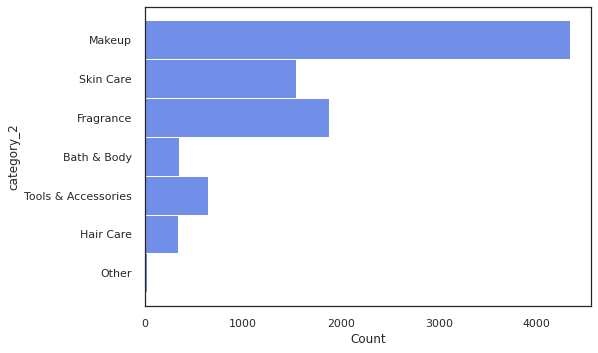

In [100]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==1) & (mercari['category_1']=='Beauty')],
             color='royalblue')

<BarContainer object of 30 artists>

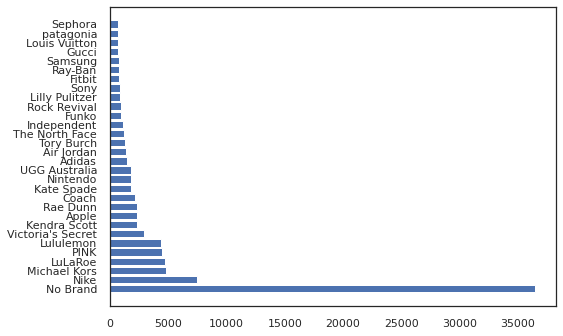

In [101]:
plt.barh(mercari[mercari['cluster']==1]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==1]['brand_name'].value_counts()[0:30])

In [166]:
marca_cluster_1 = mercari[mercari['cluster']==1]['brand_name'].value_counts()[0:30]
marca_cluster_1 = pd.DataFrame(list(marca_cluster_1),
                              index=mercari[mercari['cluster']==1]['brand_name'].value_counts().index[0:30],
                                columns=['quantidade'])
marca_cluster_1

,quantidade
No Brand,36500
Nike,7495
Michael Kors,4790
LuLaRoe,4746
PINK,4445
Lululemon,4357
Victoria's Secret,2870
Kendra Scott,2349
Apple,2322
Rae Dunn,2277


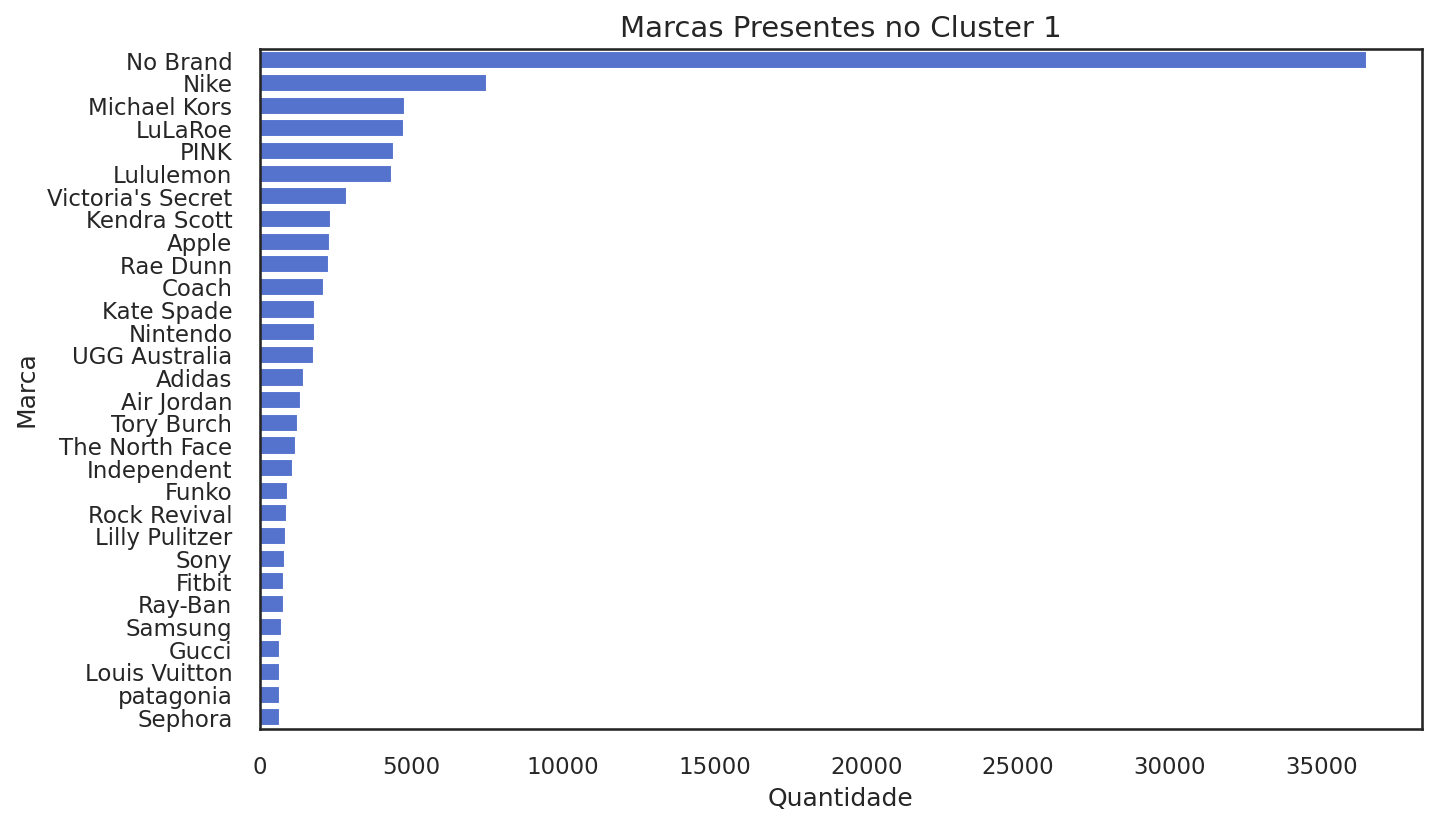

In [169]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Marcas Presentes no Cluster 1',fontsize=14)
sns.barplot(y=marca_cluster_1.index,x='quantidade',data=marca_cluster_1,color='royalblue')
plt.ylabel('Marca')
plt.xlabel('Quantidade');

## Cluster 2

In [102]:
mercari[mercari['cluster']==2].describe()['price']

count     868.000000
mean      747.996544
std       287.927981
min       484.000000
25%       550.750000
50%       659.000000
75%       829.500000
max      2009.000000
Name: price, dtype: float64

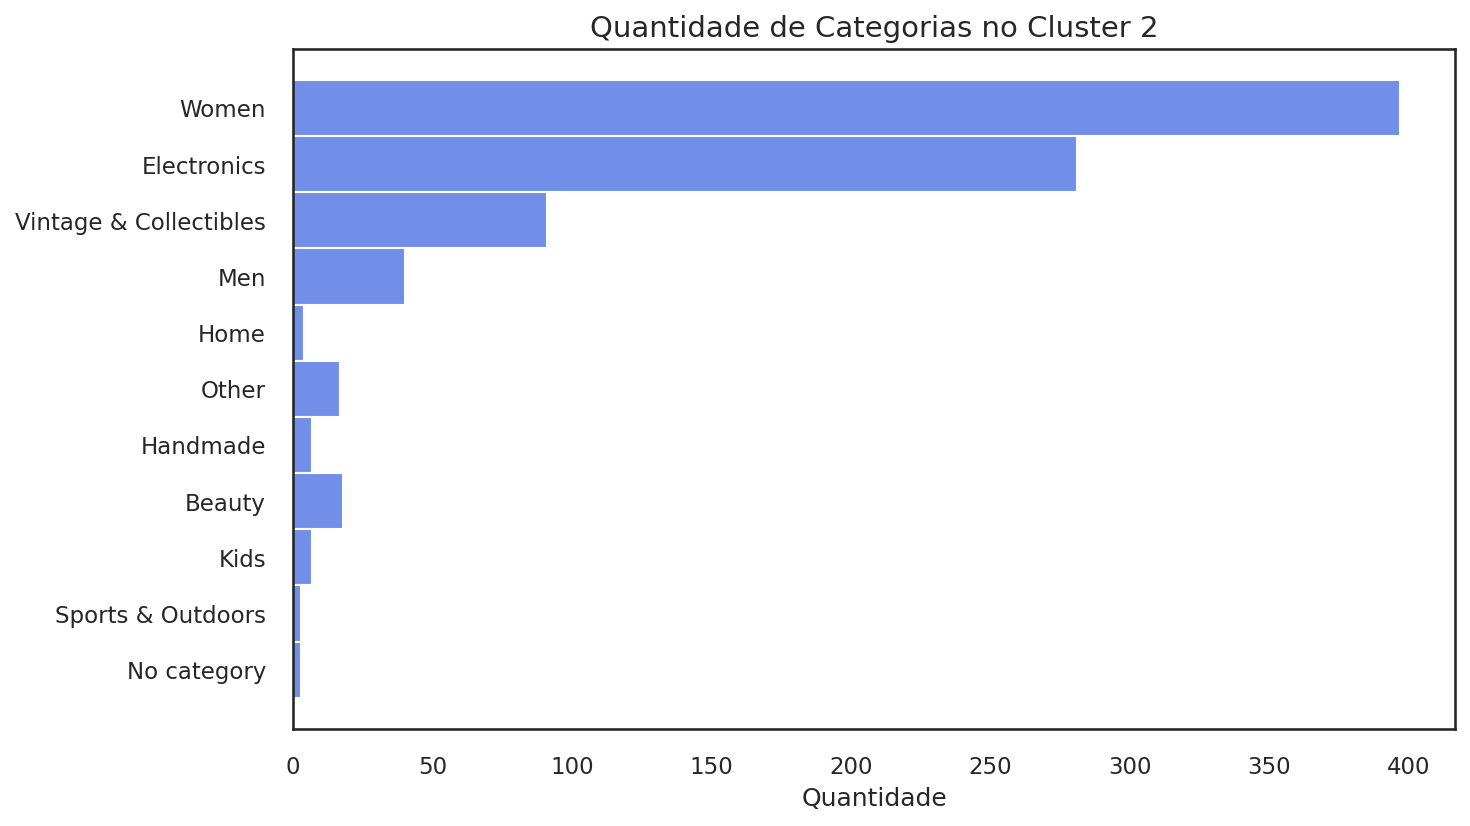

In [163]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Categorias no Cluster 2',fontsize=14)
sns.histplot(y='category_1',data=mercari[mercari['cluster']==2],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

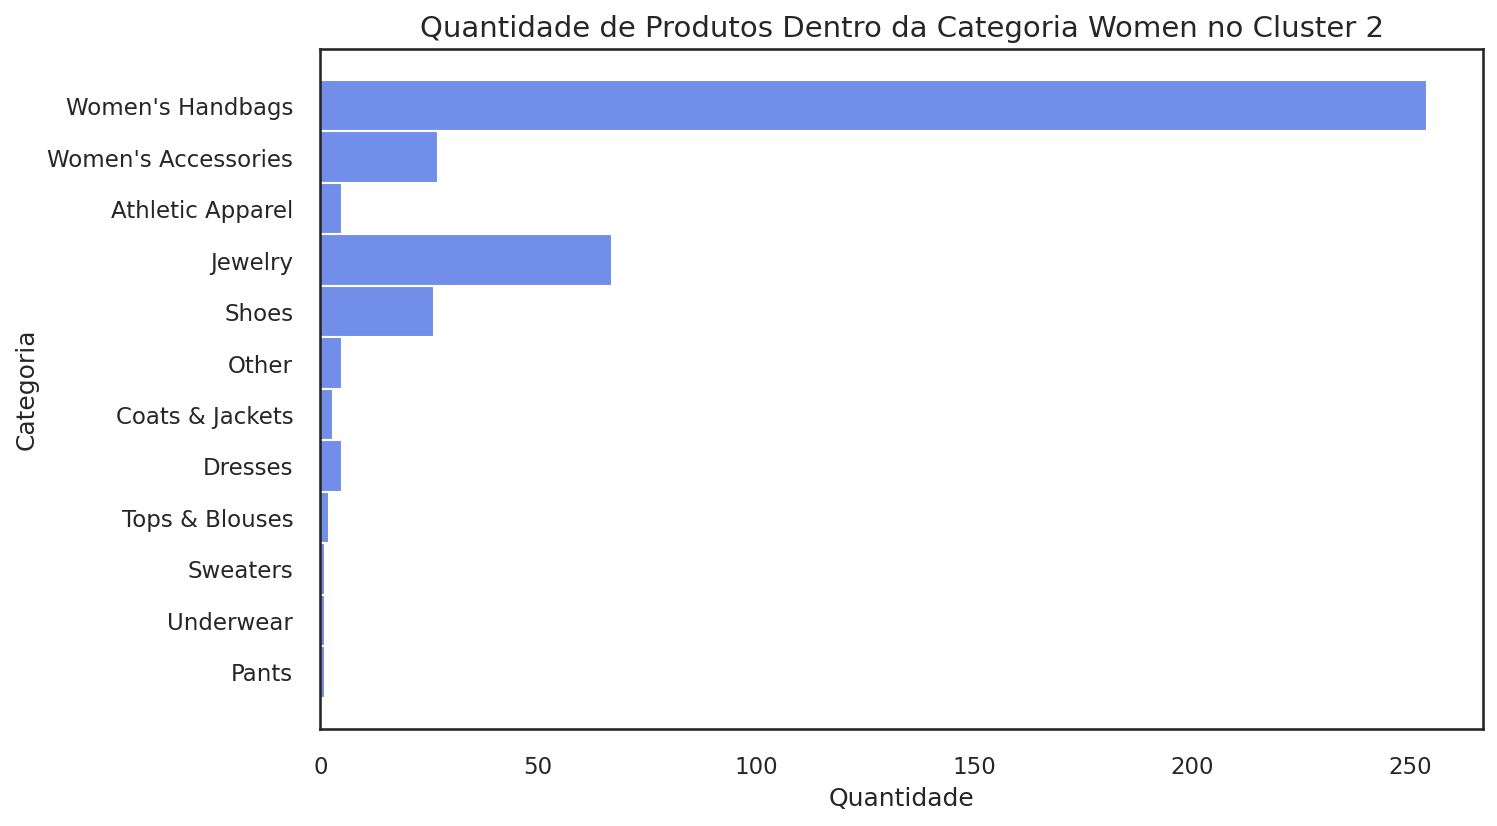

In [186]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos Dentro da Categoria Women no Cluster 2',fontsize=14)
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==2) & (mercari['category_1']=='Women')],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Categoria');

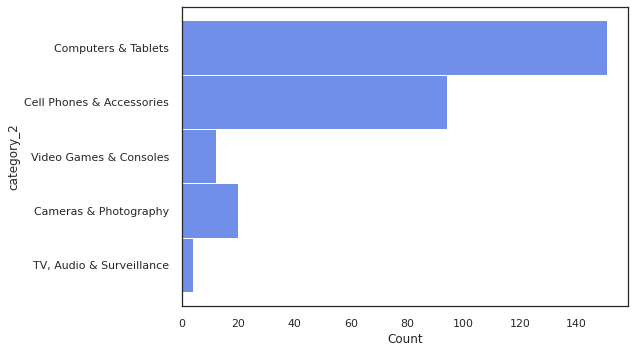

In [105]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==2) & (mercari['category_1']=='Electronics')],
             color='royalblue')

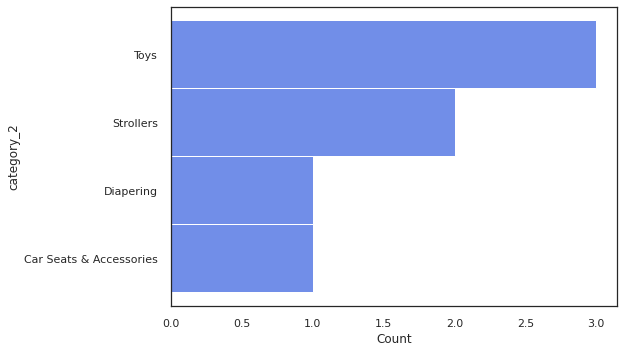

In [106]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==2) & (mercari['category_1']=='Kids')],
             color='royalblue')

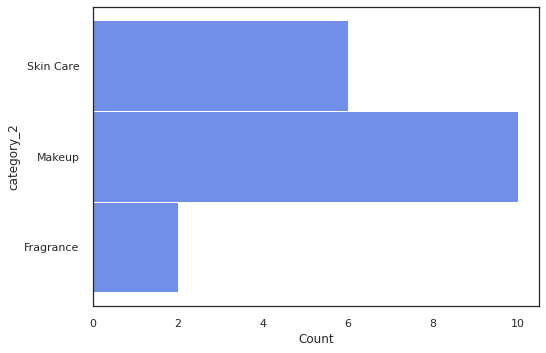

In [107]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==2) & (mercari['category_1']=='Beauty')],
             color='royalblue')

<BarContainer object of 30 artists>

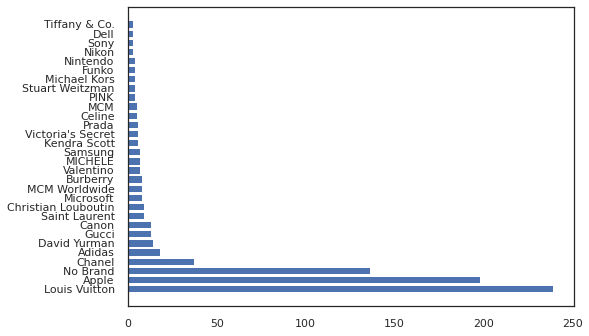

In [108]:
plt.barh(mercari[mercari['cluster']==2]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==2]['brand_name'].value_counts()[0:30])

In [171]:
marca_cluster_2 = mercari[mercari['cluster']==2]['brand_name'].value_counts()[0:30]
marca_cluster_2 = pd.DataFrame(list(marca_cluster_2),
                              index=mercari[mercari['cluster']==2]['brand_name'].value_counts().index[0:30],
                                columns=['quantidade'])
marca_cluster_2

,quantidade
Louis Vuitton,239
Apple,198
No Brand,136
Chanel,37
Adidas,18
David Yurman,14
Gucci,13
Canon,13
Saint Laurent,9
Christian Louboutin,9


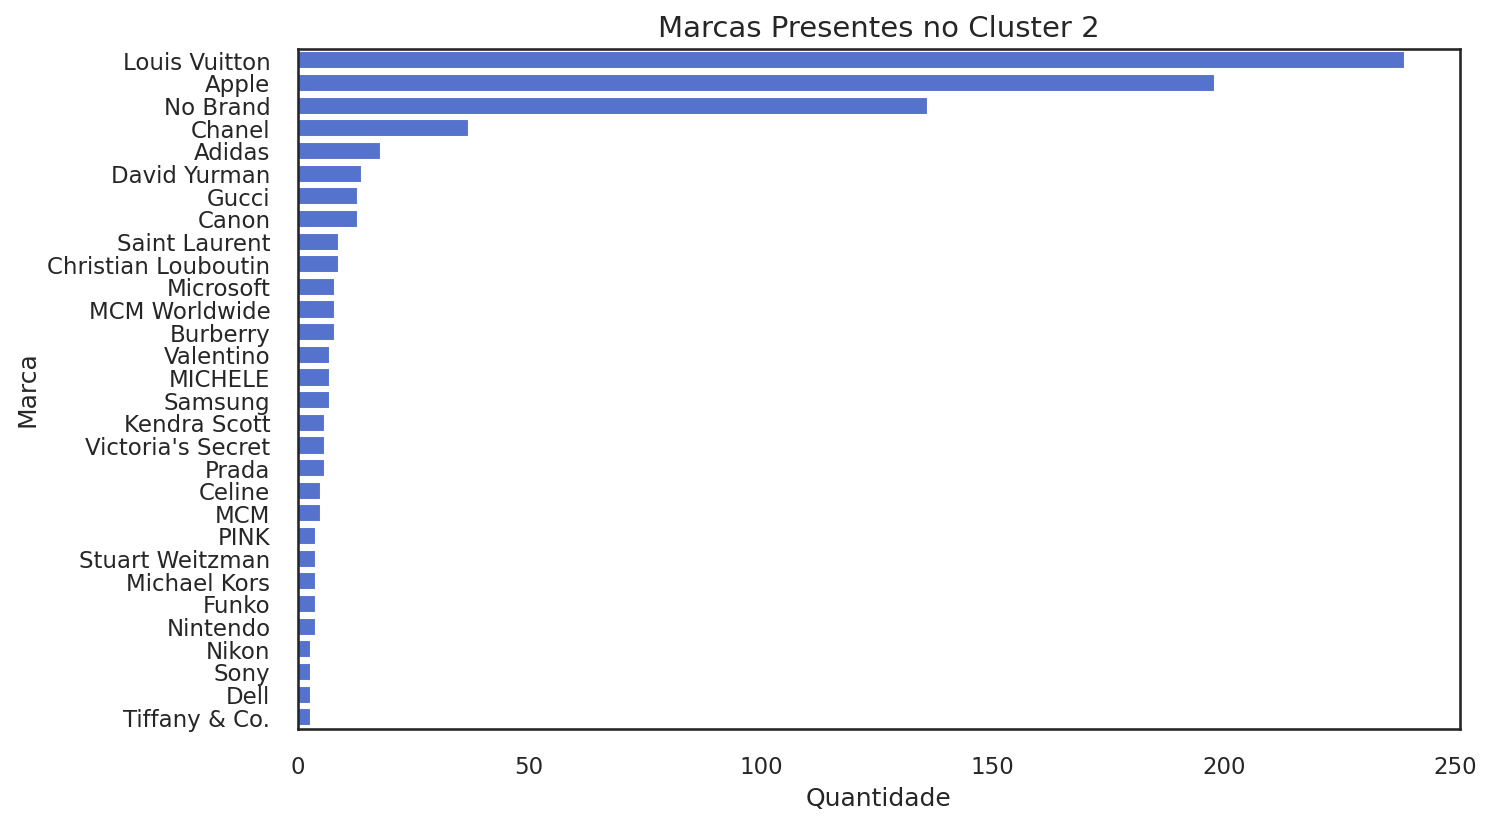

In [173]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Marcas Presentes no Cluster 2',fontsize=14)
sns.barplot(y=marca_cluster_2.index,x='quantidade',data=marca_cluster_2,color='royalblue')
plt.ylabel('Marca')
plt.xlabel('Quantidade');

## Cluster 3

In [109]:
mercari[mercari['cluster']==3].describe()['price']

count    14419.000000
mean       215.816457
std         72.283396
min        142.000000
25%        160.000000
50%        191.000000
75%        250.000000
max        481.000000
Name: price, dtype: float64

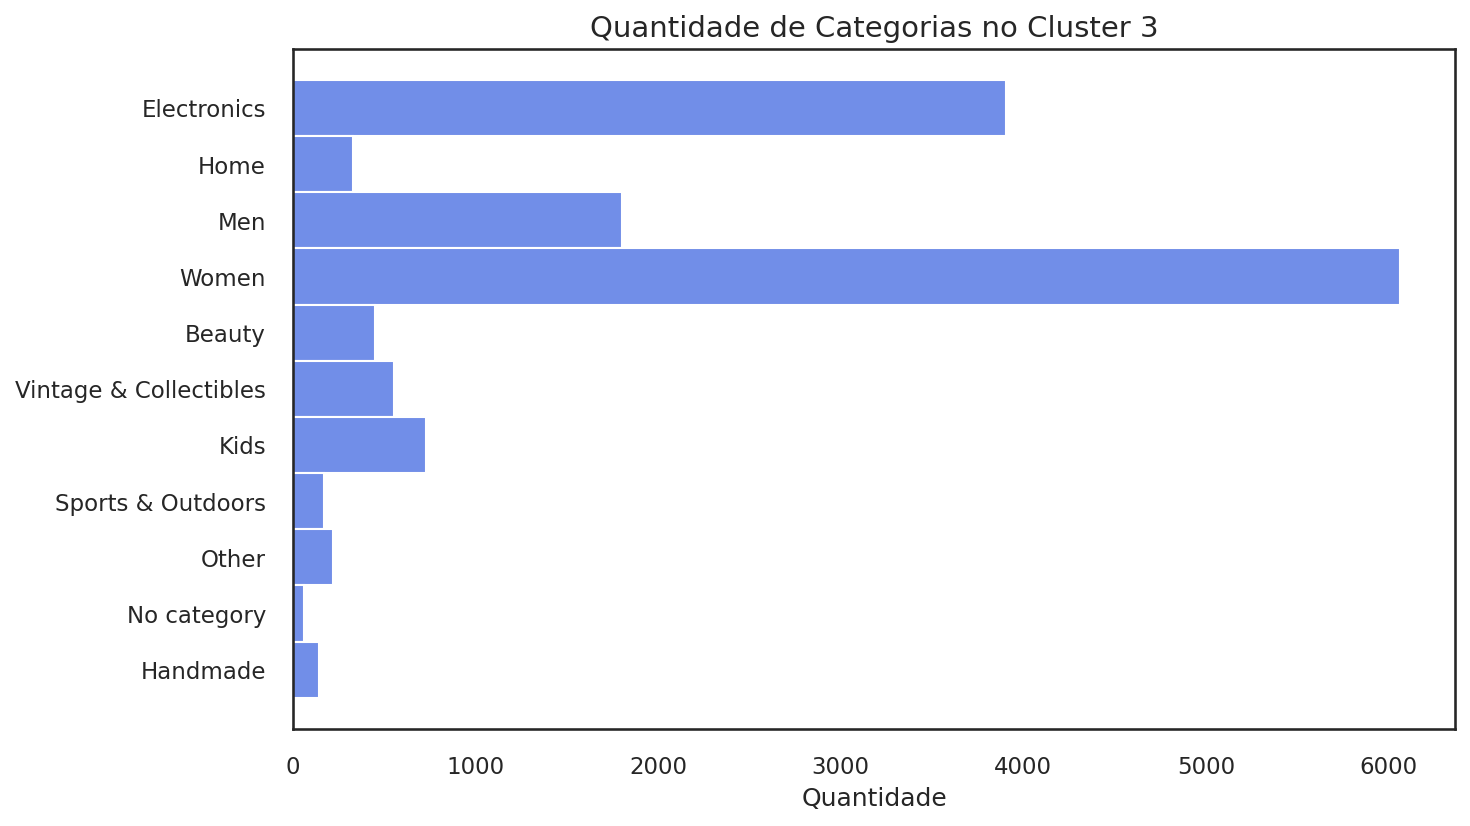

In [162]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Categorias no Cluster 3',fontsize=14)
sns.histplot(y='category_1',data=mercari[mercari['cluster']==3],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('');

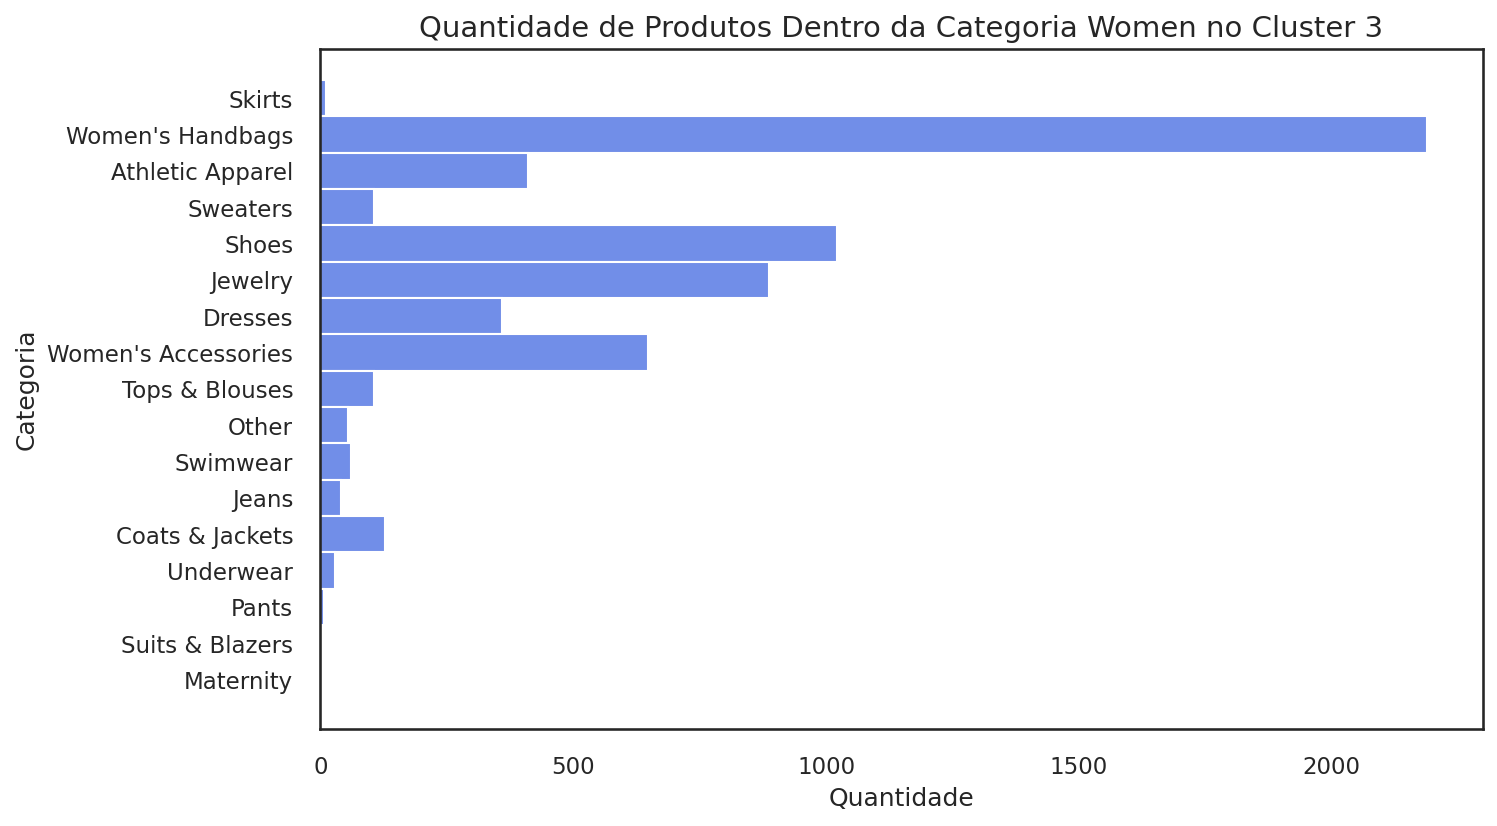

In [187]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quantidade de Produtos Dentro da Categoria Women no Cluster 3',fontsize=14)
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==3) & (mercari['category_1']=='Women')],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Categoria');

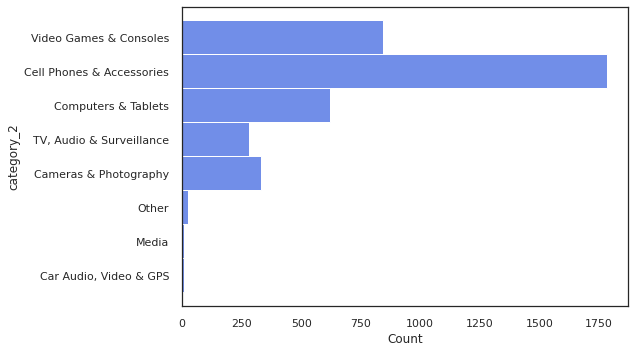

In [112]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==3) & (mercari['category_1']=='Electronics')],
             color='royalblue')

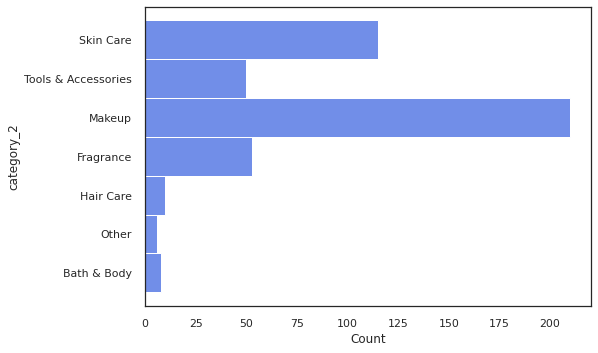

In [113]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==3) & (mercari['category_1']=='Beauty')],
             color='royalblue')

<BarContainer object of 30 artists>

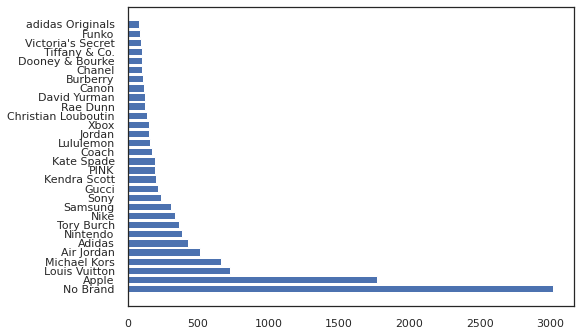

In [114]:
plt.barh(mercari[mercari['cluster']==3]['brand_name'].value_counts().index[0:30],
         mercari[mercari['cluster']==3]['brand_name'].value_counts()[0:30])

In [172]:
marca_cluster_3 = mercari[mercari['cluster']==3]['brand_name'].value_counts()[0:30]
marca_cluster_3 = pd.DataFrame(list(marca_cluster_3),
                              index=mercari[mercari['cluster']==3]['brand_name'].value_counts().index[0:30],
                                columns=['quantidade'])
marca_cluster_3

,quantidade
No Brand,3019
Apple,1769
Louis Vuitton,724
Michael Kors,660
Air Jordan,513
Adidas,431
Nintendo,385
Tory Burch,364
Nike,334
Samsung,308


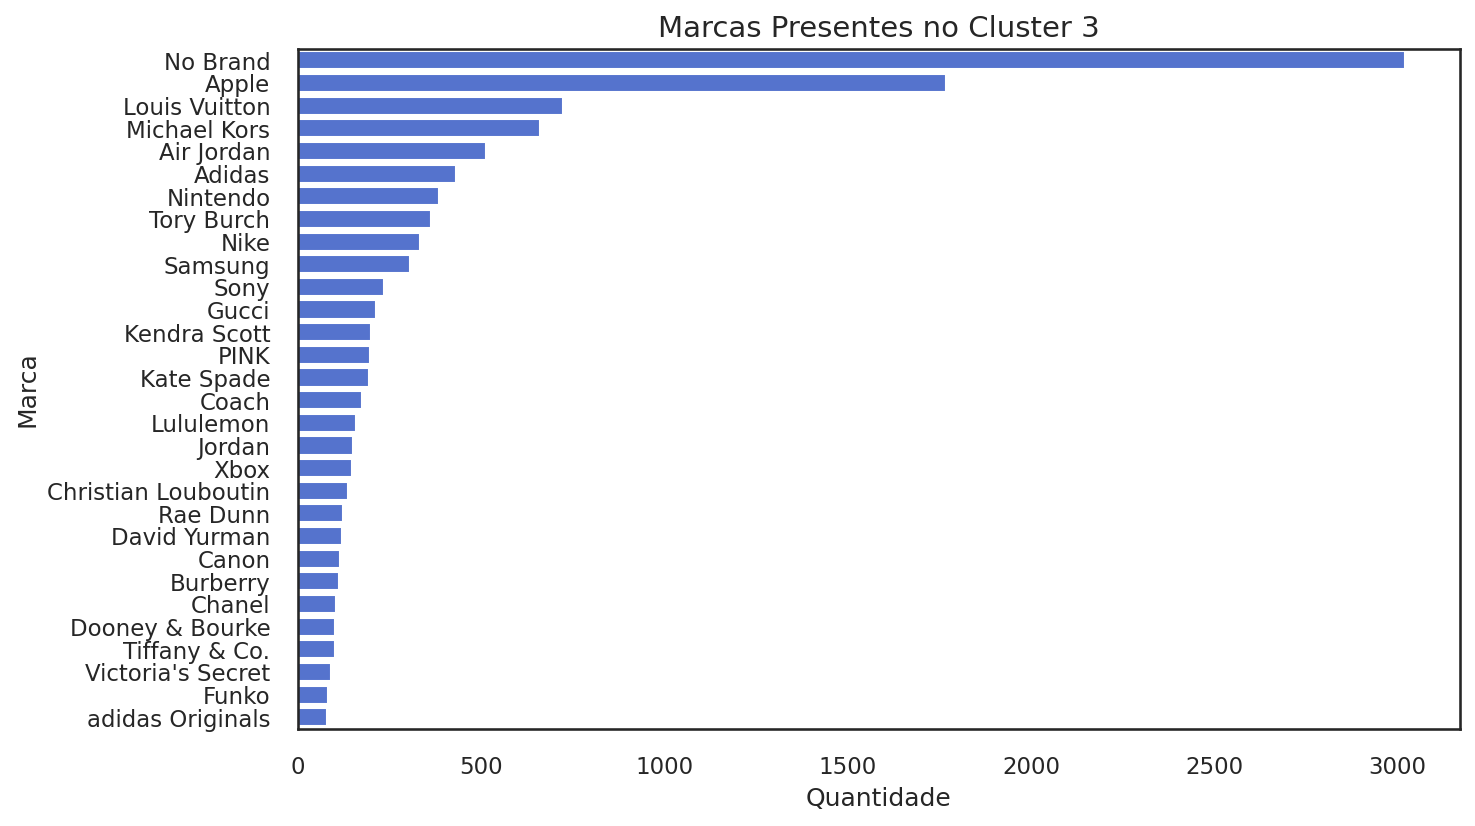

In [174]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Marcas Presentes no Cluster 3',fontsize=14)
sns.barplot(y=marca_cluster_3.index,x='quantidade',data=marca_cluster_3,color='royalblue')
plt.ylabel('Marca')
plt.xlabel('Quantidade');

In [182]:
mercari.to_csv('dataset_com_cluster.csv')